In [445]:
import pandas as pd
import scipy.sparse as sparse
import numpy as np
import random
import implicit
from sklearn.preprocessing import MinMaxScaler
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [412]:
# Set the dataframe max column width to see full url values
pd.set_option('max_colwidth',200)

In [413]:
# Load the submission data
submissions = pd.read_csv("submissions.csv")
submissions = submissions.drop("Unnamed: 0", axis=1)
display(submissions)

,cookie,gated_asset_type,page_url,form_submissions
0,20239734541707312813871963623233721188,None,ead125caee220f43a1b7947f386dc65a6a93f7eb5699216c7694f53f7529f45c,302
1,31129793568545645380196701466350770961,None,0e5ab2db7dfbaf4ad1fadf958cfecff48e23c3a8e6dd1a54e215d8c892dbd0ee,150
2,85701705200385349318705500153914757907,Gated Webinar Forms,f0e1f04f2cea00235c55306f874efa87aad4126e93b926f23b6b126aa8ebff91,72
3,51615860891898804291237848175796396513,Gated Analyst Report Forms,a723c79d4c9bf41de535cd41f755dfa3a6267423e70d0f354a5d97baa4997540,66
4,63145104878666194542260118481263767296,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,55
...,...,...,...,...
3883,31427969287471578063228180659984101240,Gated Ebook Forms,610956022fcff2f2bebd5ad9dd4a1e6ce9b4793a8d3a3f79f26d87c66d0bfc06,1
3884,31427969287471578063228180659984101240,Gated Analyst Report Forms,a723c79d4c9bf41de535cd41f755dfa3a6267423e70d0f354a5d97baa4997540,1
3885,31427969287471578063228180659984101240,Gated Analyst Report Forms,e98d732c3d944429944b1fe6d7d0f31823ac4dbdb026af3c52a162e4ffc6495f,1
3886,31427969287471578063228180659984101240,Gated Webinar Forms,7f5f7747853634694c89b8b74f636890817aacc382a80f339379faadb6ffe849,1


In [414]:
submissions["cookie"].value_counts()

51615860891898804291237848175796396513    35
66898925211856206913946087190404827630    35
72576171186661440241687835980408929936    27
09227348201657940171638891268706170958    22
23615156142528073331325841297118952883    20
                                          ..
32022027997323202771873763848801904661     1
70693549501113761473685888019210553264     1
27931535160224481253019714741067188457     1
69287963073948365132591320194561742157     1
00686196730171056022524992681524115530     1
Name: cookie, Length: 1000, dtype: int64

In [415]:
# Load the bu mapping data
bu_mapping = pd.read_csv("bu_mapping.csv")
bu_mapping = bu_mapping.drop("Unnamed: 0", axis=1)
display(bu_mapping)

,business_unit,page_url
0,a,4526209c9c4f6e18c6942fa4787cfcf76b94a95dd2e282544df9ffd64335f010
1,b,e6bc15a9d27eaadf882f034c1df102d8fc0a0400961e0a61760af4d0a505c4cc
2,d,46f40958e1a94fc4a744d966b52fa96a4be3f7302a0deeb6a15cd24c354c8ebe
3,d,38cab7ab2e9fa0eba58077e955051abb4a646a04cfc2274f7967d74bee6ac348
4,c,538e6fb7573cdcd2239a954020494c32adaac1bb9472e26941116ddbcdc87951
...,...,...
2443,g,b459c5f72c4f1c01db066f61d9d667d995d309487715df7426057efd340cd2c4
2444,a,710ee04db87f6526d62611a80d2cc1a8cfd56f7a39b0ae2e9cc3643bda0565ab
2445,b,7bebecf4591b15631c9f59b9b29734e64542b011b8aff90565fb3959b4f8daeb
2446,a,472f2d07db91a71d0ab7ff6e80d27a91c5bd2a9b86db7c837950f83e55f46575


In [416]:
bu_mapping["business_unit"].value_counts().rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,a,880
1,b,524
2,c,238
3,d,206
4,e,198
5,f,178
6,g,162
7,h,62


In [417]:
bu_mapping["page_url"].value_counts().rename_axis('page_url').reset_index(name='counts')

,page_url,counts
0,0b609e765645db28bbfb93c41ece7fa32274f92f5a0db1c72a09927d019b692c,2
1,4d8c3e693ef39719a1cd78d6d1edf397c37a010ccf80e4f25a051c016f88dacd,2
2,bc8b4d018f6a3e360ef3b6986eeae86dfaec3ed5c83a7d7cff600cea19a0ad8f,2
3,8934ef691871200ba2097dfcc7b28f013f9c2ccebc0d3454c5ba3a028d2197c2,2
4,3a2017494a01fa04e5b2433edd1666f875d32c0221709dd5b6a8011722ab8db8,2
...,...,...
2433,9b0231f13de6433edc242fa9215acae4353bb9bf7739bd588bd73674c5c71aca,1
2434,33332c5d26bf2565d824a82de70c0141373d53b5b0fc674a285437c13ca84bea,1
2435,f6fb266a6c981a4ececc361c107265ab5b532312eb6c476623c55441bf127267,1
2436,fd3fc4f904af7131ef511a1e385621406786a5635253472ea1bba9461df87dad,1


In [418]:
# Inner join the submissions data with BU data
df = pd.merge(left=submissions, right=bu_mapping, on="page_url", how="inner")
df = df.reset_index(drop=True)
display(df)

,cookie,gated_asset_type,page_url,form_submissions,business_unit
0,63145104878666194542260118481263767296,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,55,g
1,91950525933261775281124781242490198619,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,39,g
2,01980796338757100562384963273707614487,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,20,g
3,01691068891289809100226924867406953879,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,17,g
4,88921235986531421924294884939100665757,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,15,g
...,...,...,...,...,...
2261,91383539214257183430611557159382033070,Gated Webinar Forms,f459f42d948d25d3a87de7ab069d7f60b0fb9309c16f6b2d2046a84c435750cf,1,e
2262,52499945739729437741004448420467157331,Gated Webinar Forms,8daceb583e9d1be9842723c1efeb761bbdb005a8f81ff1089ad247e8a085cefb,1,a
2263,59638170403847993614105538174967943377,Gated Webinar Forms,97c4a0455d1e780b4d5d87167fcfbb5a0823e7ecbb66f5dd4e9a22ee8065f1f5,1,f
2264,59638170403847993614105538174967943377,Gated Webinar Forms,40ae2c4515fc823cd2c5a5482755dc4e2da16f696c1294e5a6389d15ba0c7e46,1,a


In [419]:
# Weights for each gated asset category
# in recommending valuable forms
event_type_strength = {
    'Unspecified': 1.0,
    'None': 1.0,
    'Gated Best Practice Form': 1.0,
    'Gated Infographics Forms': 1.0,
    'Gated Analyst Report Forms': 2.0,
    'Gated Ebook Forms': 2.0,
    'Gated Webinar Forms': 2.0,
    'Gated Case Study Forms': 2.0,
    'Gated Solution Brief Forms': 2.0,
    'Gated Whitepaper Forms': 2.0,
    'Gated DemoNow Forms': 2.5,
    'Gated Get Pricing': 3.0
}

In [420]:
# Create the event_strength column by mapping form event types to event strengths
df['event_strength'] = df['gated_asset_type'].apply(lambda x: event_type_strength[x])
# Scale the event_strength metric by the number of form submissions
df['event_strength'] = df['event_strength']*df["form_submissions"]
display(df)

,cookie,gated_asset_type,page_url,form_submissions,business_unit,event_strength
0,63145104878666194542260118481263767296,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,55,g,137.5
1,91950525933261775281124781242490198619,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,39,g,97.5
2,01980796338757100562384963273707614487,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,20,g,50.0
3,01691068891289809100226924867406953879,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,17,g,42.5
4,88921235986531421924294884939100665757,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,15,g,37.5
...,...,...,...,...,...,...
2261,91383539214257183430611557159382033070,Gated Webinar Forms,f459f42d948d25d3a87de7ab069d7f60b0fb9309c16f6b2d2046a84c435750cf,1,e,2.0
2262,52499945739729437741004448420467157331,Gated Webinar Forms,8daceb583e9d1be9842723c1efeb761bbdb005a8f81ff1089ad247e8a085cefb,1,a,2.0
2263,59638170403847993614105538174967943377,Gated Webinar Forms,97c4a0455d1e780b4d5d87167fcfbb5a0823e7ecbb66f5dd4e9a22ee8065f1f5,1,f,2.0
2264,59638170403847993614105538174967943377,Gated Webinar Forms,40ae2c4515fc823cd2c5a5482755dc4e2da16f696c1294e5a6389d15ba0c7e46,1,a,2.0


In [421]:
# Create numerical labels for url and cookie categorical data types
df['page_url'] = df["page_url"].astype('category')
df['cookie'] = df['cookie'].astype('category')
df.assign(page_url=df['page_url'].cat.codes)
df.assign(cookie=df['cookie'].cat.codes)
df['page_url_id'] = df['page_url'].cat.codes
df['cookie_id'] = df['cookie'].cat.codes
display(df)

,cookie,gated_asset_type,page_url,form_submissions,business_unit,event_strength,page_url_id,cookie_id
0,63145104878666194542260118481263767296,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,55,g,137.5,0,535
1,91950525933261775281124781242490198619,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,39,g,97.5,0,803
2,01980796338757100562384963273707614487,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,20,g,50.0,0,21
3,01691068891289809100226924867406953879,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,17,g,42.5,0,17
4,88921235986531421924294884939100665757,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,15,g,37.5,0,772
...,...,...,...,...,...,...,...,...
2261,91383539214257183430611557159382033070,Gated Webinar Forms,f459f42d948d25d3a87de7ab069d7f60b0fb9309c16f6b2d2046a84c435750cf,1,e,2.0,170,791
2262,52499945739729437741004448420467157331,Gated Webinar Forms,8daceb583e9d1be9842723c1efeb761bbdb005a8f81ff1089ad247e8a085cefb,1,a,2.0,94,439
2263,59638170403847993614105538174967943377,Gated Webinar Forms,97c4a0455d1e780b4d5d87167fcfbb5a0823e7ecbb66f5dd4e9a22ee8065f1f5,1,f,2.0,98,500
2264,59638170403847993614105538174967943377,Gated Webinar Forms,40ae2c4515fc823cd2c5a5482755dc4e2da16f696c1294e5a6389d15ba0c7e46,1,a,2.0,39,500


In [422]:
# A dataframe to view form submissions per cookie id
submission_df = df.copy()
submission_df.columns
submission_df = submission_df.filter(["cookie_id", "form_submissions"])
submission_df = submission_df.groupby('cookie_id')['form_submissions'].sum().reset_index(name='form_submissions')
display(submission_df)

,cookie_id,form_submissions
0,0,4
1,1,7
2,2,5
3,3,10
4,4,11
...,...,...
801,801,1
802,802,6
803,803,39
804,804,6


In [423]:
# Create sparse matrix representations of the data
sparse_page_cookie = sparse.csr_matrix((df['event_strength'].astype(float), (df['page_url_id'], df['cookie_id'])))

sparse_cookie_page = sparse.csr_matrix((df['event_strength'].astype(float), (df['cookie_id'], df['page_url_id'])))

In [424]:
# Create and fit an ALS model
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=50)

alpha = 15
data = (sparse_page_cookie * alpha).astype('double')

model.fit(data)

In [425]:
# A dataframe to view page data
pages_df = df.drop(['cookie', 'form_submissions', "event_strength", "cookie_id"], axis=1)
pages_df = pages_df.drop_duplicates()
display(pages_df)

,gated_asset_type,page_url,business_unit,page_url_id
0,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,g,0
70,Gated Analyst Report Forms,e0a8364ea9b728651d70a0102c094e30e88e27d54fb5bffa4d3a7578d41a683b,d,157
132,Gated DemoNow Forms,73587e574bf2a812b5f4b2a66dbe11aeafade27809c4cece2ef27cef6bffd421,b,76
191,Gated DemoNow Forms,c0308d7f58ebfeddff64cd249b2e200b8e21d9c1cd0152535fff076acce50aea,a,131
476,Gated Ebook Forms,25f1b61cc8c9ac67b91c9511aa3a06819d8f9719c60a9cd2ec4c9f0ff64cda3a,a,24
...,...,...,...,...
2261,Gated Webinar Forms,f459f42d948d25d3a87de7ab069d7f60b0fb9309c16f6b2d2046a84c435750cf,e,170
2262,Gated Webinar Forms,8daceb583e9d1be9842723c1efeb761bbdb005a8f81ff1089ad247e8a085cefb,a,94
2263,Gated Webinar Forms,97c4a0455d1e780b4d5d87167fcfbb5a0823e7ecbb66f5dd4e9a22ee8065f1f5,f,98
2264,Gated Webinar Forms,40ae2c4515fc823cd2c5a5482755dc4e2da16f696c1294e5a6389d15ba0c7e46,a,39


In [426]:
def similar(page_url_id, n):
    # Calculate the n most similar pages to a given page
    cookie_vecs = model.user_factors
    page_vecs = model.item_factors
    page_norms = np.sqrt((page_vecs * page_vecs).sum(axis=1))

    scores = page_vecs.dot(page_vecs[page_url_id]) / page_norms
    top_idx = np.argpartition(scores, -n)[-n:]
    similar = sorted(zip(top_idx, scores[top_idx] / page_norms[page_url_id]), key=lambda x: -x[1])
    
    similar_df = pd.DataFrame(similar, columns = ["page_url_id", "score"])
    
    # join page data with similar data
    similar_df = pd.merge(left=similar_df, right=pages_df, on="page_url_id", how="inner")
    return similar_df

In [427]:
# Find the 11 most similar pages to a given page (only 174 pages)
page_url_id = 34
n = 11
s = similar(page_url_id, n)
display(s)

,page_url_id,score,gated_asset_type,page_url,business_unit
0,34,1.000000,Gated Ebook Forms,33e96d2c60a0f35112a48a3e635fcac32fb44cc39a966aa3b2d3d433cd91dc76,d
1,148,0.661501,Gated Ebook Forms,d751728e426a22ee175538a5eabfff498ac039332e0593abb4aca49dcec228da,a
2,127,0.578022,Gated Whitepaper Forms,bce7b873523f2f8e969ab8116cc93ebf2fd107469853f18c1844b1f3a29f048a,d
3,57,0.526937,Gated Analyst Report Forms,5da7e47ab1b42b62d498fbe644e29914a13e6d47f04046cdea7a52b8571ed7e9,d
4,144,0.513467,Gated Whitepaper Forms,d1421e332ec2b8d877d8f790b4fa0eec39a76c166ca4a36ee0acc605294e9c9a,a
5,97,0.490131,Gated Get Pricing,97b5a50d6463e0959520c22ca85538193f4e7e81e4fc66e832315f6d236e0b87,f
6,100,0.487043,Gated Whitepaper Forms,99a5aefafe7342f773cc629dde2f8270a51f840b293bda91fb99dc9adbfc5f1e,a
7,43,0.443553,Gated DemoNow Forms,445bb43365f3cb72cef0a87c0c228af37b999f1a1f7b74c20894ed15d10beca6,c
8,161,0.404814,Gated Analyst Report Forms,e54792ace7e035b8777828bd446d0a1ce8c9ff75b6d562bb849e427621782e9f,f
9,83,0.397030,Gated Whitepaper Forms,7a3dc1d49606081b0ebfcab33426adbd8a22ebef7c021ccf0cbac670ba0921a8,d


In [428]:
# Add avergae page similarity data to the pages dataframe 
pages_df = pages_df.drop_duplicates(subset=["page_url_id"])
pages_df["avg_score"] = pages_df["page_url_id"].map(lambda page_url_id: similar(page_url_id, 11)[1:]["score"].mean())
pages_df = pages_df.sort_values(by=["avg_score"], ascending=False).reset_index(drop=True)
display(pages_df)

,gated_asset_type,page_url,business_unit,page_url_id,avg_score
0,Gated Best Practice Form,948acddda38c0b9baaf19773bc787679be69aa3460dbd01df2a8e1bad30bb4c8,g,96,0.904303
1,Gated Best Practice Form,a967f6cc3fcdfbe4d81fb7b1da52934fe58a6ae16bcb45c8266409b808092607,d,118,0.899804
2,Gated Best Practice Form,f0193ace899b89c6cc99adbfc35cd681196d3d06d2b8179ac0aa831b5773961e,b,167,0.879774
3,Gated Best Practice Form,56c97d90cbfda06719af2707128a1db732d73dc7aadc9bfa66e68498454bfce5,f,52,0.878457
4,Gated Best Practice Form,cdbcd9dea1d28134aff5dc1067c746d0689680805d905562ad4a4f4d10387ac6,e,142,0.876815
...,...,...,...,...,...
170,Gated DemoNow Forms,73587e574bf2a812b5f4b2a66dbe11aeafade27809c4cece2ef27cef6bffd421,b,76,0.245302
171,Gated DemoNow Forms,3a2017494a01fa04e5b2433edd1666f875d32c0221709dd5b6a8011722ab8db8,f,36,0.237796
172,Gated Analyst Report Forms,e98d732c3d944429944b1fe6d7d0f31823ac4dbdb026af3c52a162e4ffc6495f,a,164,0.227817
173,Gated DemoNow Forms,010d75e14b77d4f7df043d2e51a6b9ee779aa5449067954c5bab96943dd05f08,g,0,0.209439


In [429]:
# View all pages
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pages_df)

,gated_asset_type,page_url,business_unit,page_url_id,avg_score
0,Gated Best Practice Form,948acddda38c0b9baaf19773bc787679be69aa3460dbd01df2a8e1bad30bb4c8,g,96,0.904303
1,Gated Best Practice Form,a967f6cc3fcdfbe4d81fb7b1da52934fe58a6ae16bcb45c8266409b808092607,d,118,0.899804
2,Gated Best Practice Form,f0193ace899b89c6cc99adbfc35cd681196d3d06d2b8179ac0aa831b5773961e,b,167,0.879774
3,Gated Best Practice Form,56c97d90cbfda06719af2707128a1db732d73dc7aadc9bfa66e68498454bfce5,f,52,0.878457
4,Gated Best Practice Form,cdbcd9dea1d28134aff5dc1067c746d0689680805d905562ad4a4f4d10387ac6,e,142,0.876815
5,Gated Webinar Forms,a6158cca5a50b6b922f8c3f69fdc7ed6aa3877f6e43687e0dae5721406dc41ae,a,115,0.871949
6,Gated Best Practice Form,4183514c5115ad0df27a69702321c68e84ffab172ea51bf77230b29283978f3c,b,41,0.869171
7,Gated Best Practice Form,a525f5cd171cf0885fdb9ae7d662583ea4edf05ba71c05eccfdd34388f92113b,d,114,0.848840
8,Gated Best Practice Form,c3377aead8a34a034083a143b8c199117d7b7d967257519cfc0dcc53ac0a7017,e,133,0.801362
9,Gated Webinar Forms,6c0c12a09520e442504486ca837ad1e49b1e816fa31827c1902c5b291be90d24,b,67,0.786279


In [430]:
# How similar is each asset type on average to itself
temp_df = pages_df.groupby('gated_asset_type')['avg_score'].mean().reset_index(name='avg_avg_score')
temp_df = temp_df.sort_values(by="avg_avg_score", ascending=False).reset_index(drop=True)
display(temp_df)

,gated_asset_type,avg_avg_score
0,Gated Best Practice Form,0.846048
1,Gated Solution Brief Forms,0.665505
2,Gated Infographics Forms,0.642578
3,Gated Webinar Forms,0.614294
4,Gated Case Study Forms,0.612134
5,None,0.602755
6,Gated Whitepaper Forms,0.592399
7,Gated Ebook Forms,0.588413
8,Gated Analyst Report Forms,0.518139
9,Gated Get Pricing,0.460306


<IPython.core.display.Javascript object>


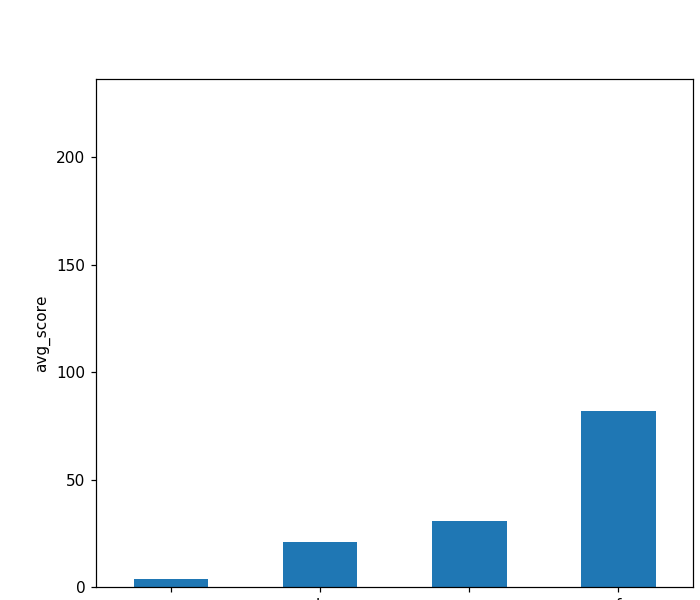

In [431]:
# Plot of average similarity score by page url id
ax1 = pages_df.plot.scatter(x='page_url_id', y='avg_score')

In [395]:
def recommend(cookie_id, sparse_cookie_page, cookie_vecs, page_vecs, num_contents=10):
    # Get the interactions scores from the sparse cookie content matrix
    cookie_interactions = sparse_cookie_page[cookie_id,:].toarray()
    # Add 1 to everything, so that pages with no interaction yet become equal to 1
    cookie_interactions = cookie_interactions.reshape(-1) + 1
    # Make pages already interacted zero
    cookie_interactions[cookie_interactions > 1] = 0
    # Get dot product of cookie vector and all page vectors
    rec_vector = cookie_vecs[cookie_id,:].dot(page_vecs.T)
    
    rec_vector = rec_vector.toarray()
    
    # Scale this recommendation vector between 0 and 1
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    # Content already interacted have their recommendation multiplied by zero
    recommend_vector = cookie_interactions * rec_vector_scaled
    # Sort the indices of the content into order of best recommendations
    page_idx = np.argsort(recommend_vector)[::-1][:num_contents]
    
    # Start empty list to store titles and scores
    titles = []
    scores = []
    business_units = []
    
    for idx in page_idx:
        # Append titles and scores to the list
        titles.append(df["page_url"].loc[df.page_url_id == idx].iloc[0])
        business_units.append(df["business_unit"].loc[df.page_url_id == idx].iloc[0])
        scores.append(recommend_vector[idx])

    recommendations = pd.DataFrame({'page_url': titles, 'business_unit': business_units, 'score': scores})

    return recommendations

In [432]:
# Get the trained person and content vectors. We convert them to csr matrices
cookie_vecs = sparse.csr_matrix(model.user_factors)
page_vecs = sparse.csr_matrix(model.item_factors)

In [433]:
def view_recommendations(cookie_id):
    pages_consumed = df.loc[df['cookie_id'] == cookie_id].sort_values(by=['event_strength'], ascending=False)[['page_url', 'business_unit', 'cookie_id', 'event_strength']]

    pages_consumed = pages_consumed.reset_index(drop=True)
    
    display(pages_consumed)
    unique_consumed_bus = list(pages_consumed["business_unit"].map(lambda x: x.strip()).unique())

    print("unique_consumed_bus:")
    print(unique_consumed_bus)

    max_event_strength = pages_consumed['event_strength'].max()
    
    top_consumed = pages_consumed[pages_consumed["event_strength"] == max_event_strength]
    
    top_consumed_bus = top_consumed["business_unit"]
    top_consumed_bus = list(top_consumed_bus.map(lambda x: x.strip()).unique())
    print("top_consumed_bus:")
    print(top_consumed_bus)

    pages_recommended = recommend(cookie_id, sparse_cookie_page, cookie_vecs, page_vecs)
    
    pages_recommended = pages_recommended.reset_index(drop=True)

    display(pages_recommended)

    unique_recommended_bus = list(pages_recommended["business_unit"].map(lambda x: x.strip()).unique())
    print("unique_recommended_bus: ")
    print(unique_recommended_bus)
    
    top_recommended = pages_recommended.iloc[0]
    top_recommended_bu = top_recommended["business_unit"]
    print("top_recommended_bu: "+top_recommended_bu)

    hits = 0
    top_hits = 0
    for recommended_bu in pages_recommended["business_unit"]:
        recommended_bu = recommended_bu.strip()
        if recommended_bu in top_consumed_bus:
            top_hits = top_hits + 1
        if recommended_bu in unique_consumed_bus:
            hits = hits + 1
    print("-"*30)
    print("hit rate: "+str(hits/10))
    print("top hit rate: "+str(top_hits/10))
    return pages_consumed, pages_recommended

In [434]:
def get_hits(cookie_id):
    pages_consumed = df.loc[df['cookie_id'] == cookie_id].sort_values(by=['event_strength'], ascending=False)[['page_url', 'business_unit', 'cookie_id', 'event_strength']]

    unique_consumed_bus = list(pages_consumed["business_unit"].map(lambda x: x.strip()).unique())
    max_event_strength = pages_consumed['event_strength'].max()
    
    top_consumed = pages_consumed[pages_consumed["event_strength"] == max_event_strength]
    
    top_consumed_bus = top_consumed["business_unit"]
    top_consumed_bus = list(top_consumed_bus.map(lambda x: x.strip()).unique())

    pages_recommended = recommend(cookie_id, sparse_cookie_page, cookie_vecs, page_vecs)

    hits = 0
    top_hits = 0
    for recommended_bu in pages_recommended["business_unit"]:
        recommended_bu = recommended_bu.strip()
        if recommended_bu in top_consumed_bus:
            top_hits = top_hits + 1
        if recommended_bu in unique_consumed_bus:
            hits = hits + 1
    return hits/10, top_hits/10

In [435]:
# A dataframe to view the number of interactions and form submissions per cookie id
interaction_df = df["cookie_id"].value_counts().rename_axis("cookie_id").reset_index(name='interactions')
interaction_df = pd.merge(left=interaction_df, right=submission_df, on="cookie_id")
interaction_df = interaction_df.drop_duplicates()
interaction_df = interaction_df.reset_index(drop=True)
display(interaction_df)

,cookie_id,interactions,form_submissions
0,427,25,74
1,39,19,25
2,577,17,17
3,629,17,33
4,119,13,21
...,...,...,...
801,19,1,12
802,21,1,20
803,23,1,6
804,25,1,11


In [436]:
# Get all the data from the master dataframe
hit_df = interaction_df.copy()

# compute hit rate metrics for each cookie id and add them as columns
hit_df["hit_rate"], hit_df["top_hit_rate"] = zip(*hit_df["cookie_id"].apply(lambda cookie_id: get_hits(cookie_id)))
hit_df["cumulative_hit_rate"] = hit_df["hit_rate"]+hit_df["top_hit_rate"]
display(hit_df)

,cookie_id,interactions,form_submissions,hit_rate,top_hit_rate,cumulative_hit_rate
0,427,25,74,0.9,0.6,1.5
1,39,19,25,1.0,0.4,1.4
2,577,17,17,1.0,0.3,1.3
3,629,17,33,0.9,0.0,0.9
4,119,13,21,0.9,0.1,1.0
...,...,...,...,...,...,...
801,19,1,12,0.1,0.1,0.2
802,21,1,20,0.4,0.4,0.8
803,23,1,6,0.4,0.4,0.8
804,25,1,11,0.2,0.2,0.4


In [437]:
# copy the hit_df
top_hit_df = hit_df.copy()
# sort by cumulative hit rate
top_hit_df = top_hit_df.sort_values(by=["cumulative_hit_rate", "cookie_id"], ascending=False)
# filter by cumulative hit rate
# top_hit_df = top_hit_df[ top_hit_df["submissions"] <= 4]

display(top_hit_df)
# display(top_hit_df[top_hit_df["cumulative_hit_rate"] >= 1.5])
# hit_df.sort_values(by=["hit_rate"], ascending=False)

,cookie_id,interactions,form_submissions,hit_rate,top_hit_rate,cumulative_hit_rate
360,750,2,3,0.9,0.9,1.8
49,739,6,6,0.9,0.9,1.8
73,651,6,6,0.9,0.9,1.8
35,513,7,7,0.9,0.9,1.8
14,466,9,9,1.0,0.8,1.8
...,...,...,...,...,...,...
781,29,1,5,0.1,0.1,0.2
801,19,1,12,0.1,0.1,0.2
714,658,1,4,0.0,0.0,0.0
730,458,1,1,0.0,0.0,0.0


In [439]:
# top_hit_df["hit_rate"].value_counts().sort_index().plot(kind='bar', figsize=(7, 6), rot=0)

In [440]:
# top_hit_df["top_hit_rate"].value_counts().sort_index().plot(kind='bar', figsize=(7, 6), rot=0)

In [441]:
# top_hit_df["cumulative_hit_rate"].value_counts().sort_index().plot(kind='bar', figsize=(14, 12), rot=0)

In [443]:
# View form recommendations for each cookie id
cookie_id = 44
pages_consumed, pages_recommended = view_recommendations(cookie_id)

,page_url,business_unit,cookie_id,event_strength
0,710ee04db87f6526d62611a80d2cc1a8cfd56f7a39b0ae2e9cc3643bda0565ab,a,44,4.0
1,610956022fcff2f2bebd5ad9dd4a1e6ce9b4793a8d3a3f79f26d87c66d0bfc06,a,44,4.0
2,a49fdf4c003e0ea218c70c3680b4a97bbef109d267b6eb71ba41b2bf7294ab23,a,44,2.0
3,6cc207ff7b83c339df33f32cf759eb1d207da28f342db354c3cf0c1a1456577f,a,44,2.0


unique_consumed_bus:
['a']
top_consumed_bus:
['a']


,page_url,business_unit,score
0,db29083d843b96cc15865656fe85888eb6daad1f711cd8ebb8dc71b5ee5dd70c,a,0.872328
1,8180b43717e2f062802f3b4e3d44f1fc581d08d31aa84814567cee16848bf6a3,f,0.628383
2,a1555b0ca5c8c2f0920bbbf79b7633261f134e49f155b0b06b622cc5ef32122e,b,0.617740
3,59d5346fa494fe990007b716db2c7a24eca04e53cb0626053b52d54e332acf25,a,0.603325
4,a63c23c48c8767b67702a71011edc5a004dcb99daf2160c9ee9175f475ae1615,f,0.579341
5,85c8abe3ea68d4644b29a27a4af941d88172d9901c182cbb6e48fd1f7aa39f19,a,0.577435
6,3f9d1234b28046b08806d646030391054fbe0abf812d1ebfeee72214047eb315,b,0.554057
7,59af2d91a05fdc5be8e85ed13d5759e4fd4e9201f0ee4e926fc6201f71ffca9e,f,0.548620
8,2bf5ac0c4060fd2728c2684ee6f7462f09f39725dff702b1110353874b37249e,e,0.531253
9,4d8c3e693ef39719a1cd78d6d1edf397c37a010ccf80e4f25a051c016f88dacd,a,0.527675


unique_recommended_bus: 
['a', 'f', 'b', 'e']
top_recommended_bu: a
------------------------------
hit rate: 0.4
top hit rate: 0.4


<IPython.core.display.Javascript object>


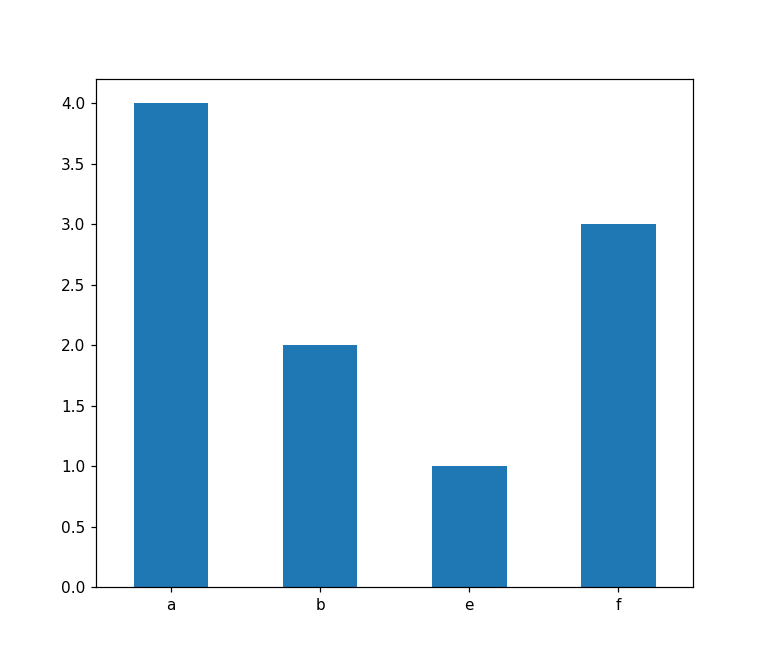

In [446]:
# View distribution of page recommendations by business unit
pages_recommended["business_unit"].value_counts().sort_index().plot(kind='bar', figsize=(7, 6), rot=0)

<IPython.core.display.Javascript object>


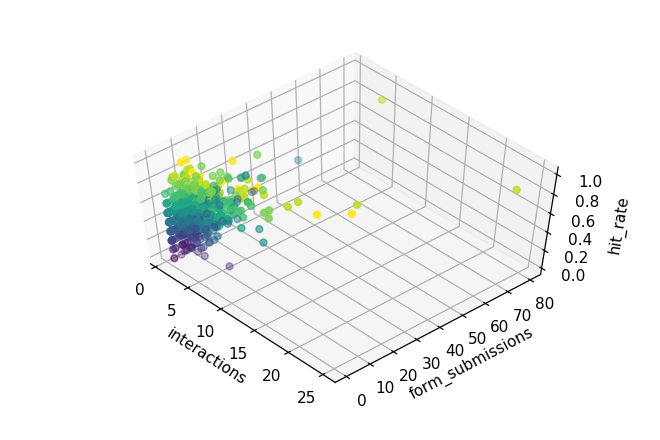

Text(0.5, 0, 'hit_rate')

In [447]:
# View distribution of interactions, form submissions, and hit rate in 3d
# hopefully higher interactions and form_submissions imply higher hit rate

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection="3d")

xdata = top_hit_df["interactions"]*1
ydata = top_hit_df["form_submissions"]*1
zdata = top_hit_df["hit_rate"]*1

ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.set_xlabel("interactions")
ax.set_ylabel("form_submissions")
ax.set_zlabel("hit_rate")
